## Step 1: Import Libraries

In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import math

## Step 2: Load Dataset (Airline Passengers dataset from online source)

In [7]:

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=["Month"], index_col="Month")

df.to_csv(r"C:\Users\hp\Codveda Projects\Task 7 Time Series Analysis\data\airline_passengers.csv")


## Step 3: Visualize the Time Series

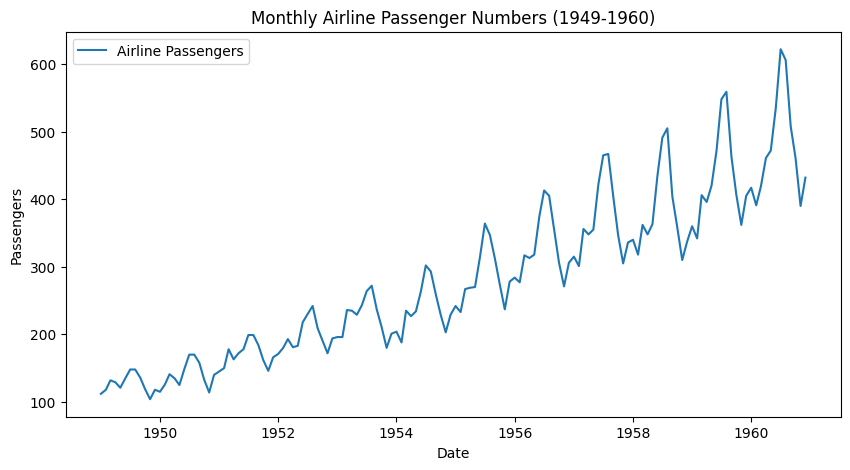

In [8]:

plt.figure(figsize=(10,5))
plt.plot(df, label="Airline Passengers")
plt.title("Monthly Airline Passenger Numbers (1949-1960)")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.savefig(r"C:\Users\hp\Codveda Projects\Task 7 Time Series Analysis\Visuals\Monthly Airline Passenger Numbers (1949-1960).png", dpi=300, bbox_inches='tight')
plt.show()

## Step 4: Decompose the Time Series

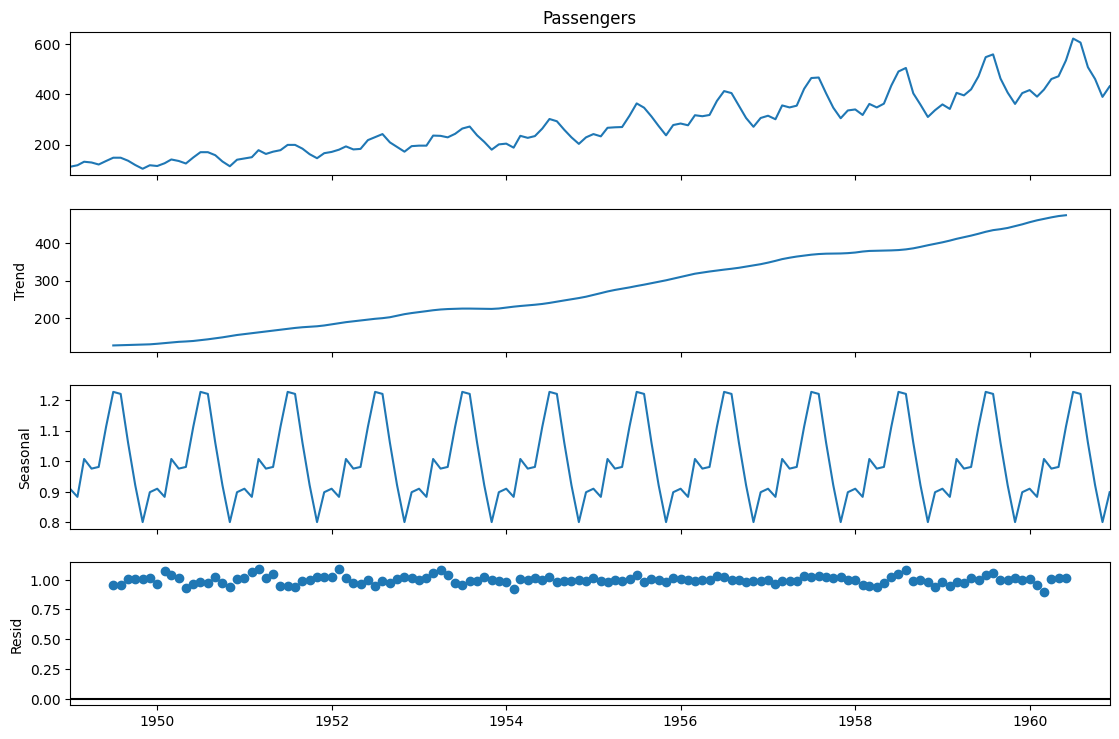

In [9]:

decomposition = seasonal_decompose(df["Passengers"], model="multiplicative", period=12)
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.savefig(r"C:\Users\hp\Codveda Projects\Task 7 Time Series Analysis\Visuals\Decompose the Time Series.png", dpi=300, bbox_inches='tight')
plt.show()

## Step 5: Moving Average Smoothing

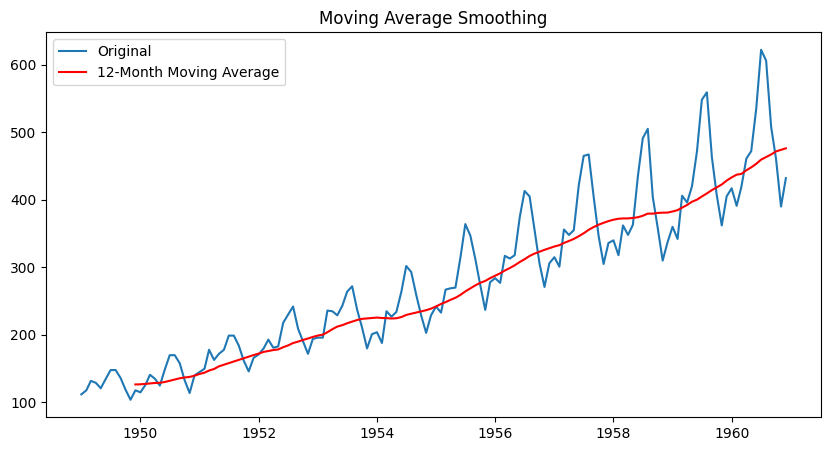

In [10]:

df["MA_12"] = df["Passengers"].rolling(window=12).mean()
plt.figure(figsize=(10,5))
plt.plot(df["Passengers"], label="Original")
plt.plot(df["MA_12"], label="12-Month Moving Average", color="red")
plt.title("Moving Average Smoothing")
plt.legend()
plt.savefig(r"C:\Users\hp\Codveda Projects\Task 7 Time Series Analysis\Visuals\Moving Average Smoothing.png", dpi=300, bbox_inches='tight')
plt.show()

## Step 6: Exponential Smoothing

C:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


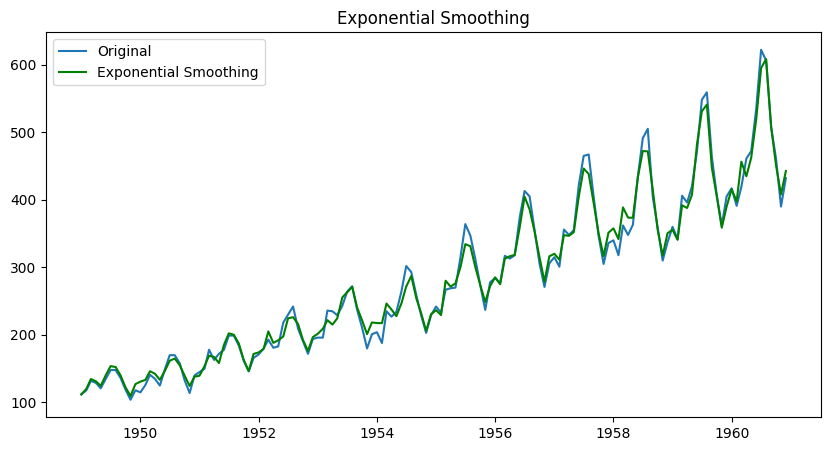

In [11]:

model_es = ExponentialSmoothing(df["Passengers"], trend="add", seasonal="add", seasonal_periods=12)
fit_es = model_es.fit()
df["Exp_Smooth"] = fit_es.fittedvalues
plt.figure(figsize=(10,5))
plt.plot(df["Passengers"], label="Original")
plt.plot(df["Exp_Smooth"], label="Exponential Smoothing", color="green")
plt.title("Exponential Smoothing")
plt.legend()
plt.savefig(r"C:\Users\hp\Codveda Projects\Task 7 Time Series Analysis\Visuals\Exponential Smoothing.png", dpi=300, bbox_inches='tight')
plt.show()

## Step 7: Stationarity Check (ADF Test)

In [12]:

adf_test = adfuller(df["Passengers"])
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])

ADF Statistic: 0.8153688792060482
p-value: 0.991880243437641


## Step 8: Plot ACF and PACF

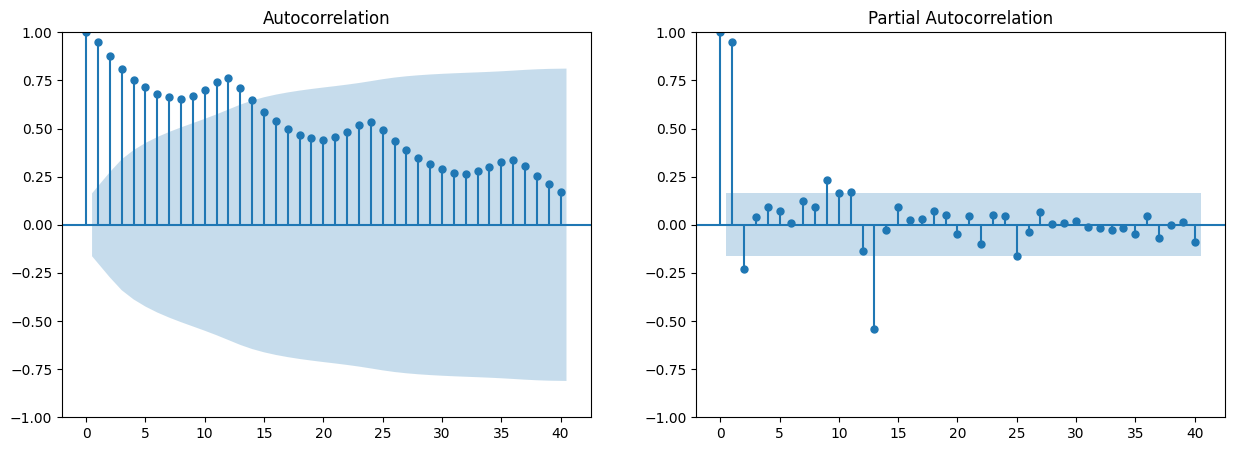

In [13]:

fig, axes = plt.subplots(1, 2, figsize=(15,5))
plot_acf(df["Passengers"], lags=40, ax=axes[0])
plot_pacf(df["Passengers"], lags=40, ax=axes[1])
plt.savefig(r"C:\Users\hp\Codveda Projects\Task 7 Time Series Analysis\Visuals\Plot ACF and PACF.png", dpi=300, bbox_inches='tight')
plt.show()

## Step 9: Train-Test Split

In [14]:

train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

## Step 10: ARIMA Model

In [30]:

model_arima = ARIMA(train["Passengers"], order=(2,1,2))  # (p,d,q)
fit_arima = model_arima.fit()

train.index.freq = "MS"



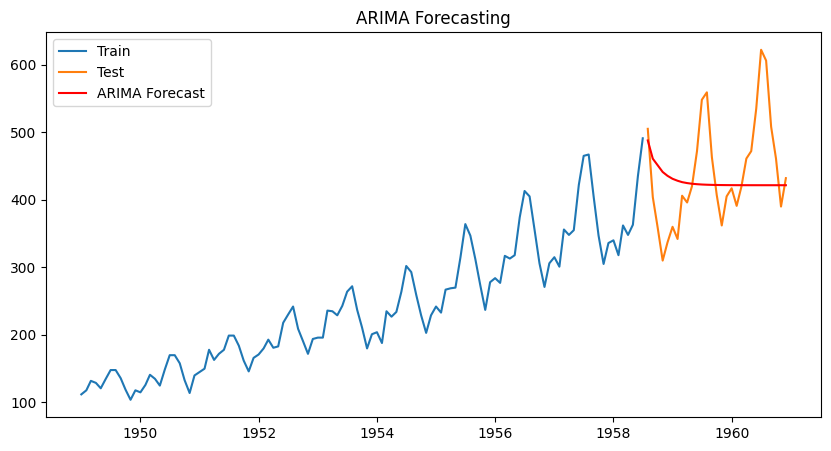

In [31]:
# Forecast

forecast_arima = fit_arima.forecast(steps=len(test))
plt.figure(figsize=(10,5))
plt.plot(train["Passengers"], label="Train")
plt.plot(test["Passengers"], label="Test")
plt.plot(test.index, forecast, label="ARIMA Forecast", color="red")
plt.title("ARIMA Forecasting")
plt.legend()
plt.savefig(r"C:\Users\hp\Codveda Projects\Task 7 Time Series Analysis\Visuals\Forecast-ARIMA.png", dpi=300, bbox_inches='tight')
plt.show()

## Step 11: Model Evaluation

In [21]:

rmse = math.sqrt(mean_squared_error(test["Passengers"], forecast))
print("ARIMA RMSE:", rmse)

ARIMA RMSE: 82.51301128388961


## Step 12: SARIMA Model

### Seasonal order chosen based on monthly seasonality (12 months)

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_sarima = SARIMAX(train["Passengers"], 
                       order=(2,1,2), 
                       seasonal_order=(1,1,1,12), 
                       enforce_stationarity=False, 
                       enforce_invertibility=False)
fit_sarima = model_sarima.fit(disp=False)

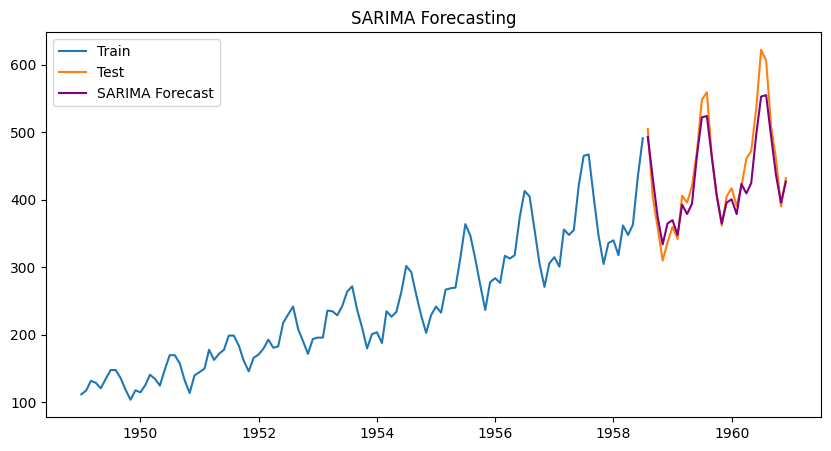

In [23]:
# Forecast
forecast_sarima = fit_sarima.forecast(steps=len(test))
plt.figure(figsize=(10,5))
plt.plot(train["Passengers"], label="Train")
plt.plot(test["Passengers"], label="Test")
plt.plot(test.index, forecast_sarima, label="SARIMA Forecast", color="purple")
plt.title("SARIMA Forecasting")
plt.legend()
plt.savefig(r"C:\Users\hp\Codveda Projects\Task 7 Time Series Analysis\Visuals\Forecast-SARIMA.png", dpi=300, bbox_inches='tight')
plt.show()

## Step 13: Compare ARIMA vs SARIMA

In [32]:

rmse_arima = math.sqrt(mean_squared_error(test["Passengers"], forecast_arima))
rmse_sarima = math.sqrt(mean_squared_error(test["Passengers"], forecast_sarima))

print("📊 Model Performance Comparison:")
print(f"ARIMA RMSE: {rmse_arima:.2f}")
print(f"SARIMA RMSE: {rmse_sarima:.2f}")

📊 Model Performance Comparison:
ARIMA RMSE: 82.51
SARIMA RMSE: 26.84


## Step 14: Combined Forecast Plot

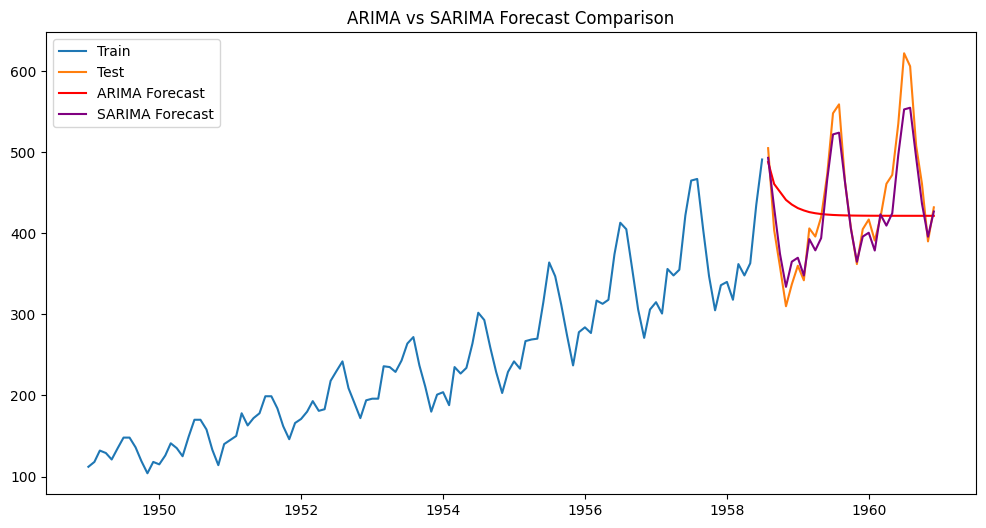

In [33]:

plt.figure(figsize=(12,6))
plt.plot(train["Passengers"], label="Train")
plt.plot(test["Passengers"], label="Test")
plt.plot(test.index, forecast_arima, label="ARIMA Forecast", color="red")
plt.plot(test.index, forecast_sarima, label="SARIMA Forecast", color="purple")
plt.title("ARIMA vs SARIMA Forecast Comparison")
plt.legend()
plt.savefig(r"C:\Users\hp\Codveda Projects\Task 7 Time Series Analysis\Visuals\ARIMA vs SARIMA Forecast Comparison.png", dpi=300, bbox_inches='tight')
plt.show()

# What this notebook does

- Loads Airline Passenger Dataset from GitHub.

- Plots raw series.

- Decomposes into trend, seasonality, residuals.

- Applies moving average & exponential smoothing.

- Performs ADF test to check stationarity.

- Uses ARIMA model for forecasting.

- Evaluates forecast with RMSE.

- Added SARIMA model with (2,1,2)(1,1,1,12) seasonal parameters.

- Compared RMSE of ARIMA vs SARIMA.

- Final combined plot shows both forecasts against actual test data.